In [6]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

In [7]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [8]:
base = pd.read_csv(path_base('db_plano_saude.csv'))

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_plano_saude.csv


In [9]:
base.head(3)

,idade,custo
0,18,871
1,23,1132
2,28,1242


In [10]:
base.shape

(10, 2)

In [11]:
X = base.iloc[:,0].values
print(X)

[18 23 28 33 38 43 48 53 58 63]


In [57]:
y = base.iloc[:,1].values
print(y)

[ 871 1132 1242 1356 1488 1638 2130 2454 3066 4090]


In [58]:
correlacao = np.corrcoef(X,y)

In [59]:
print(correlacao)

[[1.         0.93091958]
 [0.93091958 1.        ]]


In [60]:
X = X.reshape(-1,1)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [62]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# b0
regressor.intercept_

-558.9490909090907

In [64]:
# b1
regressor.coef_

array([61.86787879])

# plotar

In [65]:
import matplotlib.pyplot as plt

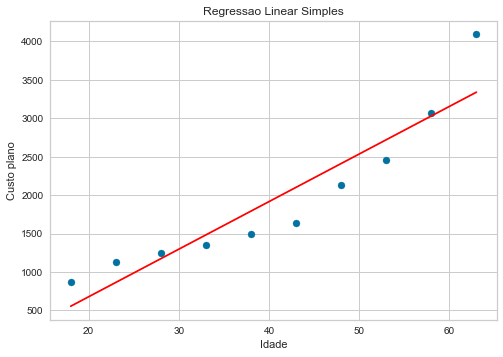

In [66]:
plt.scatter(X,y)
plt.title('Regressao Linear Simples')
plt.xlabel('Idade')
plt.ylabel('Custo plano')
plt.plot(X,regressor.predict(X),color='red')

In [67]:
print(regressor.predict(X))

[ 554.67272727  864.01212121 1173.35151515 1482.69090909 1792.03030303
 2101.36969697 2410.70909091 2720.04848485 3029.38787879 3338.72727273]


In [68]:
# 43
previsao1 = regressor.intercept_ + regressor.coef_ * 43
previsao1

array([2101.36969697])

# Score

In [69]:
score = regressor.score(X,y)
score

0.8666112727879173

In [70]:
from yellowbrick.regressor import ResidualsPlot

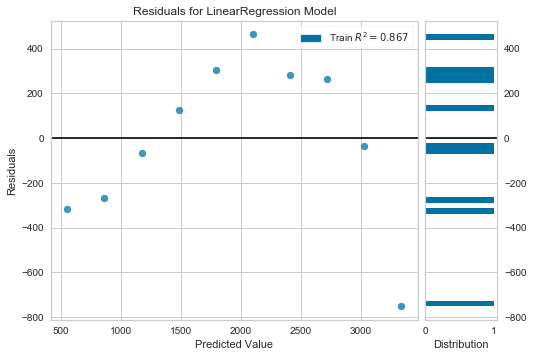

In [71]:
visualizador = ResidualsPlot(regressor)
visualizador.fit(X,y)
visualizador.poof()